<img align = 'center' src="../../Images/ML_SWE.jpg" alt = '.../Images/' width = '1000'/>

# Prediction Simulation for Water Year 2019

We will be testing and evaluating the performance of the model over the 2019 WY at select locations

For example, the operational capacity of the model should begin at the beginning of the water year (WY week 1) with a previous SWE value of 0-in for each 1-km grid.
Model evaluation could then assess the forecasting skill on a hold-out dataset of an entire year in which known neighboring values do not control predictions, but rather driving to-date predictions from the predicted previous SWE values. 
Due to the high model performance, future work will target the assessment of model skill with an operational motivation

## Model Training/Testing influence on Model Results.

The model training/testing partitioning methodology has a strong influence on model performance and the goal of model evaluation.
The objective of the modeling effort was to examine the spatial extrapolation capacity of the model from selected monitoring stations to the overall region, best suited to a 75/25% training/testing split, respectively.
While it is critical to address the strong serial correlation in SWE accumulation and melt throughout the season, the high correlation between weeks has the potential to inflate model skill when using a 75/25% training/testing split due to the previous SWE feature being known.
An assessment of the operational capacity of the model is different than assessing the ability to extrapolate regional SWE from in-situ monitoring stations.
For example, the operational capacity of the model should begin at the beginning of the water year (WY week 1) with a previous SWE value of 0-in for each 1-km grid.
Model evaluation could then assess the forecasting skill on a hold-out dataset of an entire year in which known neighboring values do not control predictions, but rather driving to-date predictions from the predicted previous SWE values. 
Due to the high model performance, future work will target the assessment of model skill with an operational motivation.

In [1]:
import os
import sys
sys.path.insert(0, '..') #sys allows for the .ipynb file to connect to the shared folder files
from shared_scripts import Hindcast_Initialization, NSM_SCA

#Set working directories
cwd = os.getcwd() 
datapath = f"{os.path.expanduser('~')}/SWEML"

2024-02-27 15:04:36.432370: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-02-27 15:04:36.432410: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## Bring prediction DFs in
The Prediction DFs do not store after a git push to reduce the file size on GitHub.
Make sure you have the correct model name in the function

In [2]:
#Hindcast_Initialization.AWS_to_Hindcast('LSTM')

In [3]:
#Get datetime and corresponding background information to evaluate hindcast
new_year = '2019'
threshold = '20.0'
Region_list = ['N_Sierras','S_Sierras_High', 'S_Sierras_Low']
model = 'LSTM'

datelist = Hindcast_Initialization.Hindcast_Initialization(cwd, datapath, new_year, threshold, Region_list)
EvalDF = Hindcast_Initialization.HindCast_DataProcess(datelist,Region_list,cwd, datapath, model)

Creating files for a historical simulation within  'N_Sierras', 'S_Sierras_High', 'S_Sierras_Low'  regions for water year  2019
New simulation start files complete


## Run your SSM in hindcast mode to evaluate operational capacity.



In [4]:
model = 'LSTM'

#run the model through all time (data acqusition already completed)
for day in datelist:
    print('Updating SWE predictions for ', day)
    #connect interactive script to Wasatch Snow module
    Snow = NSM_SCA.NSM_SCA(day, threshold=threshold, Regions = Region_list, modelname = model)
    
    #Go get SNOTEL observations - all data currently loaded, set to True to download
    #Snow.Get_Monitoring_Data_Threaded(getdata = False)

    #Initialize/Download the granules, all data preprocessed for the SSM activity, change to True to use the functions.
    #Snow.initializeGranules(getdata = False)

    #Process observations into Model prediction ready format,
    #Snow.Data_Processing()

    #Agument with SCA
    #Snow.augmentPredictionDFs()

    #Make predictions
    Snow.SWE_Predict(NewSim = False, modelname= model)

Updating SWE predictions for  2018-10-02
Making predictions for:  2018-10-02
N_Sierras


2024-02-27 15:04:46.013527: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-27 15:04:46.013718: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-02-27 15:04:46.013796: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2024-02-27 15:04:46.013895: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2024-02-27 15:04:46.013961: W tensorflow/stream_executor/platform/default/dso_loader.cc:6

72/72 [==============================] - 0s 3ms/step
                                            Long        Lat  elevation_m  \
cell_id                                                                    
0013ea8d-f647-4664-b40f-57bb96f800e5 -121.310593  39.779513      1335.50   
001476f9-a9d5-4128-8210-e2c4879ce505 -120.753637  39.391823      1340.50   
00270da4-a790-4b81-a693-e1e8c4f13e6e -121.301610  39.551315       341.25   
00325ba7-fcbe-4bab-8c4f-f70cfe80ea46 -121.310593  40.295338      1815.50   
003ca3a3-c298-4253-9f1b-7f6a1a097ca6 -119.963120  39.329313      2690.25   
...                                          ...        ...          ...   
018cf1a1-f945-4097-9c47-0c4690538bb5 -120.618890  39.675880      2057.50   
147d5eb4-e574-47e4-994a-8a2908c06050 -120.879401  39.786417      2013.00   
6dd37e24-0a9c-4749-8ab6-7e26d42925d6 -121.786700  40.780052      1787.00   
76b55900-eb3d-4d25-a538-f74302ffe72d -120.178716  41.993149      2261.25   
df01bf44-46b8-4541-b0a4-ed1fae16ac3

OSError: Unable to read attribute (Expected global heap object size does not match)

processing predictions into geodataframe


100%|██████████| 39/39 [00:00<00:00, 80.41it/s]


creating figures for each prediction timestep


100%|██████████| 39/39 [00:30<00:00,  1.28it/s]


Figures complete, creating .gif image


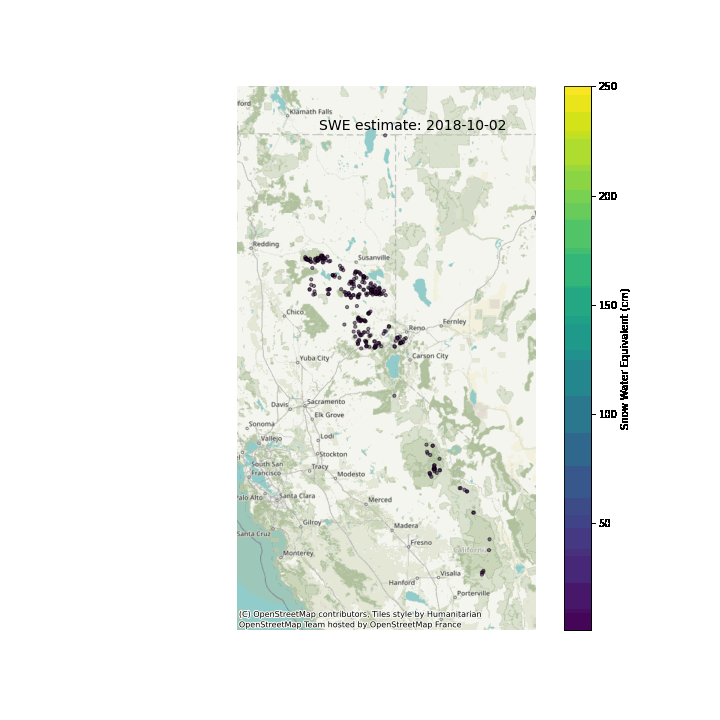

In [ ]:
Hindcast_Initialization.Snowgif(cwd, datelist, Region_list)

### Model Hindcast complete

Lets see how your model performs within SSWEET in the [Hindcast_Evaluation](./Hindcast_Evaluation.ipynb) notebook.